NameError: name 'fcluster' is not defined

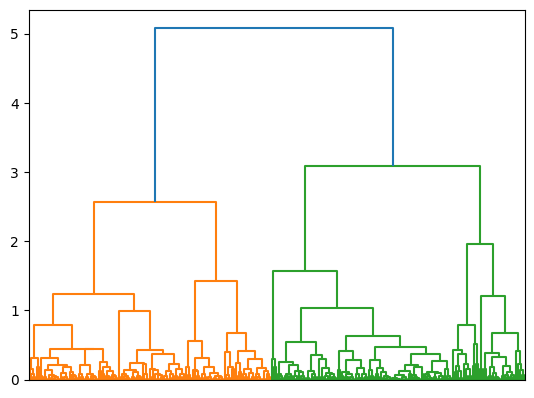

In [3]:
import pandas as pd
import numpy as np

coins = pd.read_csv("../../data/coins.csv")
def standard_units(my_data):
    '''Takes in an array of data and returns that data standardized by subtracting the mean 
    and dividing by the standard deviation'''

    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof = 1)
    standardized_data = (my_data - my_mean) / my_stddev
    
    return standardized_data

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(coins_su, method='complete')
dendrogram(Z, no_labels=True)

clusters = fcluster(Z, t=4, criterion='distance')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib.colors import ListedColormap

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
max_cluster_id = len(coins_su)

# Define a discrete colormap
n_clusters = len(coins_su)  # At most, we start with every point as its own cluster
cmap = ListedColormap(plt.cm.tab20b(np.random.permutation(np.linspace(0, 1, n_clusters))))

# Set up the figure and axis
fig, ax = plt.subplots()

# Initial scatter plot with all points in black
scatter = ax.scatter(coins_su["diameter"], coins_su["weight"], c=np.arange(n_clusters), cmap=cmap)

# Initialization function for FuncAnimation
def init():
    scatter = ax.scatter(coins_su["diameter"], coins_su["weight"], c=np.arange(n_clusters), cmap=cmap)
    return scatter,

# Function to update the plot
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, _, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su))
    for cluster_id, points in clusters.items():
        colors[points] = points[0]

    # Clear previous plot and create new scatter plot
    #ax.clear()
    scatter = ax.scatter(coins_su["diameter"], coins_su["weight"], c=colors, cmap=cmap)
    ax.set_title(f'Step: {num + 1}')
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z)-1, init_func=init, repeat=True, blit=True)

# Save the animation
ani.save('agglomerative_clustering.mp4', writer='ffmpeg', fps=4)

# Show the plot
plt.show()

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.colors import ListedColormap

# Load your data
coins = pd.read_csv("../../data/coins.csv")

# Standardize the data
def standard_units(my_data):
    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof=1)
    return (my_data - my_mean) / my_stddev

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

# Perform hierarchical clustering
Z = linkage(coins_su, method='complete')

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
max_cluster_id = len(coins_su)

# Define a discrete colormap and generate a list of colors
n_clusters = len(coins_su)
cmap = ListedColormap(plt.cm.tab20b(np.random.permutation(np.linspace(0, 1, n_clusters))))

# Create a color mapping for each point
point_colors = {i: cmap(i) for i in range(n_clusters)}

# Set up the figure and axes
fig, (ax_scatter, ax_dendro) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Step: 0')

# Initial scatter plot with all points colored according to the color mapping
scatter = ax_scatter.scatter(coins_su['diameter'], coins_su['weight'], 
                             c=[point_colors[i] for i in range(len(coins_su))])
ax_scatter.set_title("Coin Scatterplot")

# Initial dendrogram plot with custom colors for each leaf
dendro = dendrogram(Z, ax=ax_dendro, color_threshold=0, above_threshold_color='gray', no_labels=True)
for i, d in zip(dendro['icoord'], dendro['dcoord']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    ax_dendro.plot(x, y, 'o', markersize=0)
ax_dendro.set_title('Coin Dendrogram')

# Function to color the dendrogram leaves using the color mapping
def color_dendrogram_leaves(dendro, point_colors):
    for i, leaf in enumerate(dendro['leaves']):
        ax_dendro.collections[2*i].set_color(point_colors[leaf])

# Initialization function for FuncAnimation
def init():
    scatter.set_array([point_colors[i] for i in range(len(coins_su))])
    color_dendrogram_leaves(dendro, point_colors)
    return scatter,

# Function to update both plots
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, _, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su), dtype=object)
    for cluster_id, points in clusters.items():
        for point in points:
            colors[point] = point_colors[point]

    # Update scatter plot
    scatter.set_array(colors)
    fig.suptitle(f'Step: {num + 1}')

    # Update dendrogram by coloring the leaves according to the clusters
    color_dendrogram_leaves(dendro, point_colors)

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z) - 1, init_func=init, repeat=False, blit=False)

# Save the animation
ani.save('agglomerative_clustering_with_dendrogram.mp4', writer='ffmpeg', fps=4)

# Show the plot
plt.show()


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x123fccee0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Collections can only map rank 1 arrays

ValueError: Collections can only map rank 1 arrays

<Figure size 1200x600 with 2 Axes>

Update function called with num=0
Step: 1
Merging clusters: 7 and 70 into new cluster 272
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92],

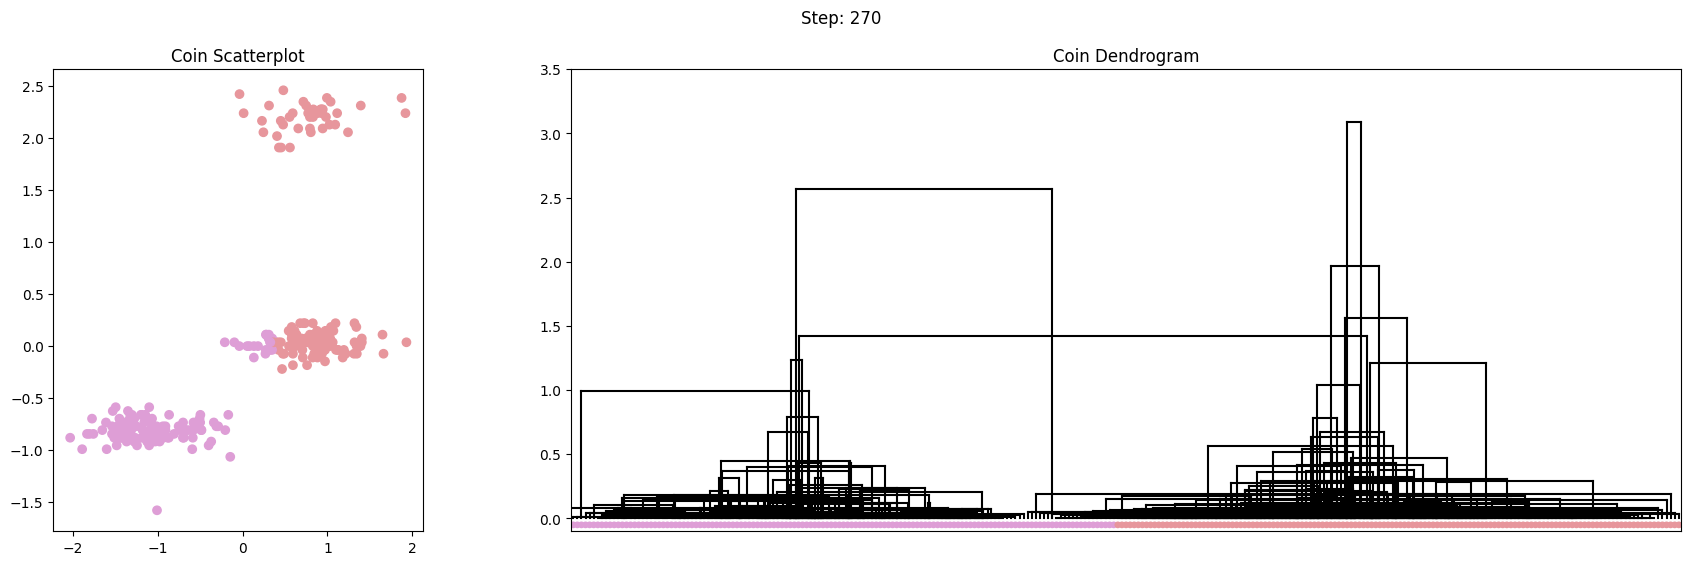

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage, dendrogram

# Load your data
coins = pd.read_csv("../../data/coins.csv")

# Standardize the data
def standard_units(my_data):
    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof=1)
    return (my_data - my_mean) / my_stddev

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

# Perform hierarchical clustering
Z = linkage(coins_su, method='complete')

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
clusters1 = clusters.copy()
max_cluster_id = len(coins_su)

# Define a discrete colormap and generate a list of colors
n_clusters = len(coins_su)
cmap = plt.cm.tab20b(np.linspace(0, 1, n_clusters))
np.random.shuffle(cmap)

# Create a color mapping for each point
point_colors = {i: cmap[i] for i in range(n_clusters)}

# Set up the figure and axes
fig, (ax_scatter, ax_dendro) = plt.subplots(1, 2, width_ratios=[1, 3], figsize=(21, 6))
fig.suptitle('Step: 0')

# Initial scatter plot with all points colored according to the color mapping
scatter = ax_scatter.scatter(coins_su['diameter'], coins_su['weight'], 
                             c=[point_colors[i] for i in range(len(coins_su))])
ax_scatter.set_title("Coin Scatterplot")

# Prepare the dendrogram data but don't plot yet
dendro = dendrogram(Z, color_threshold=0, above_threshold_color='gray', no_labels=True, no_plot=True)
ax_dendro.scatter(np.arange(1,273)*10, np.zeros(len(point_colors))-0.05, s=15, c=[point_colors[i] for i in dendro['leaves']])
ax_dendro.set_xticks([])
ax_dendro.xaxis.set_tick_params(labelbottom=False)

point_to_leaf = pd.DataFrame({"points":np.arange(n_clusters),"leaves":dendro['leaves']})
leaf_to_point = point_to_leaf.sort_values("leaves")

# Function to progressively draw the dendrogram
def draw_dendrogram(ax, dendro, num, colors):
    # Clear the previous dendrogram
    ax.clear()

    dendro_scatter = ax_dendro.scatter(np.arange(1,273)*10, np.zeros(len(colors))-0.05, s=15, c=[colors[i] for i in dendro['leaves']])

    # Set the title
    ax.set_title('Coin Dendrogram')

    # Draw each segment up to the current step
    for i in range(num + 1):
        c1, c2, dist, _ = Z[i]
        c1, c2 = int(c1), int(c2)

        # Determine the coordinates for cluster 1 and 2
        x1 = np.mean([j for j in clusters1[c1]])*10
        x2 = np.mean([j for j in clusters1[c2]])*10

        y = dist

        # Draw horizontal lines at the distance level
        ax.plot([x1, x2], [y, y], 'k-')
        # Draw vertical lines to the new merge point
        ax.plot([x1, x1], [0, y], 'k-')
        ax.plot([x2, x2], [0, y], 'k-')

    # Set labels and ticks
    ax.set_xticks([])
    ax.xaxis.set_tick_params(labelbottom=False)
            
    # Set the x and y limits based on the data
    ax.set_xlim(min([min(icoord) for icoord in dendro['icoord']]), 
                max([max(icoord) for icoord in dendro['icoord']]))
    ax.set_ylim(-0.1, 
                3.5)
    
    ax.set_xticks([])
    ax.xaxis.set_tick_params(labelbottom=False)


    #ax.invert_yaxis()  # Invert y-axis to have the root at the top

# Initialization function for FuncAnimation
def init():
    scatter.set_color([point_colors[i] for i in range(len(coins_su))])
    draw_dendrogram(ax_dendro, dendro, 0, [point_colors[i] for i in dendro['leaves']])
    return scatter,

# Function to update both plots
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, _, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster
    clusters1[max_cluster_id + num] = new_cluster

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su), dtype=object)
    for cluster_id, points in clusters.items():
        for point in points:
            colors[point] = point_colors[points[0]]

    # Update scatter plot
    scatter.set_color(colors)
    fig.suptitle(f'Step: {num + 1}')

    # Draw the dendrogram up to the current step
    draw_dendrogram(ax_dendro, dendro, num, colors)

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z) - 1, init_func=init, repeat=False, blit=True)

# Save the animation
ani.save('agglomerative_clustering_with_dendrogram.mp4', writer='ffmpeg', fps=4)

# Show the plot
plt.show()


In [91]:
point_to_leaf = pd.DataFrame({"points":np.arange(n_clusters),"leaves":dendro['leaves']})
leaf_to_point = point_to_leaf.sort_values("leaves")

In [94]:
[p for p in leaf_to_point['points']]

[69,
 33,
 70,
 49,
 8,
 24,
 22,
 54,
 53,
 52,
 120,
 124,
 40,
 0,
 109,
 41,
 131,
 35,
 111,
 19,
 122,
 23,
 66,
 9,
 25,
 77,
 15,
 14,
 1,
 20,
 71,
 17,
 117,
 112,
 60,
 6,
 125,
 31,
 132,
 82,
 12,
 80,
 72,
 10,
 56,
 36,
 126,
 108,
 7,
 38,
 50,
 26,
 75,
 13,
 59,
 73,
 4,
 115,
 128,
 39,
 67,
 121,
 16,
 37,
 63,
 45,
 84,
 43,
 5,
 78,
 55,
 62,
 11,
 118,
 107,
 85,
 123,
 119,
 116,
 21,
 18,
 113,
 81,
 32,
 79,
 64,
 46,
 57,
 68,
 2,
 29,
 51,
 83,
 114,
 47,
 74,
 27,
 44,
 127,
 42,
 65,
 76,
 129,
 130,
 58,
 110,
 30,
 61,
 48,
 34,
 3,
 28,
 259,
 137,
 243,
 140,
 158,
 156,
 184,
 177,
 199,
 104,
 150,
 182,
 152,
 206,
 143,
 176,
 229,
 241,
 174,
 228,
 270,
 230,
 99,
 86,
 261,
 265,
 165,
 224,
 215,
 148,
 105,
 163,
 138,
 94,
 256,
 200,
 232,
 102,
 87,
 210,
 188,
 252,
 106,
 194,
 207,
 141,
 179,
 249,
 173,
 222,
 134,
 267,
 192,
 245,
 238,
 167,
 236,
 237,
 223,
 226,
 146,
 208,
 271,
 171,
 211,
 202,
 201,
 246,
 268,
 216,
 178,
 8

Update function called with num=0
Step: 1
Merging clusters: 7 and 70 into new cluster 272
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92],

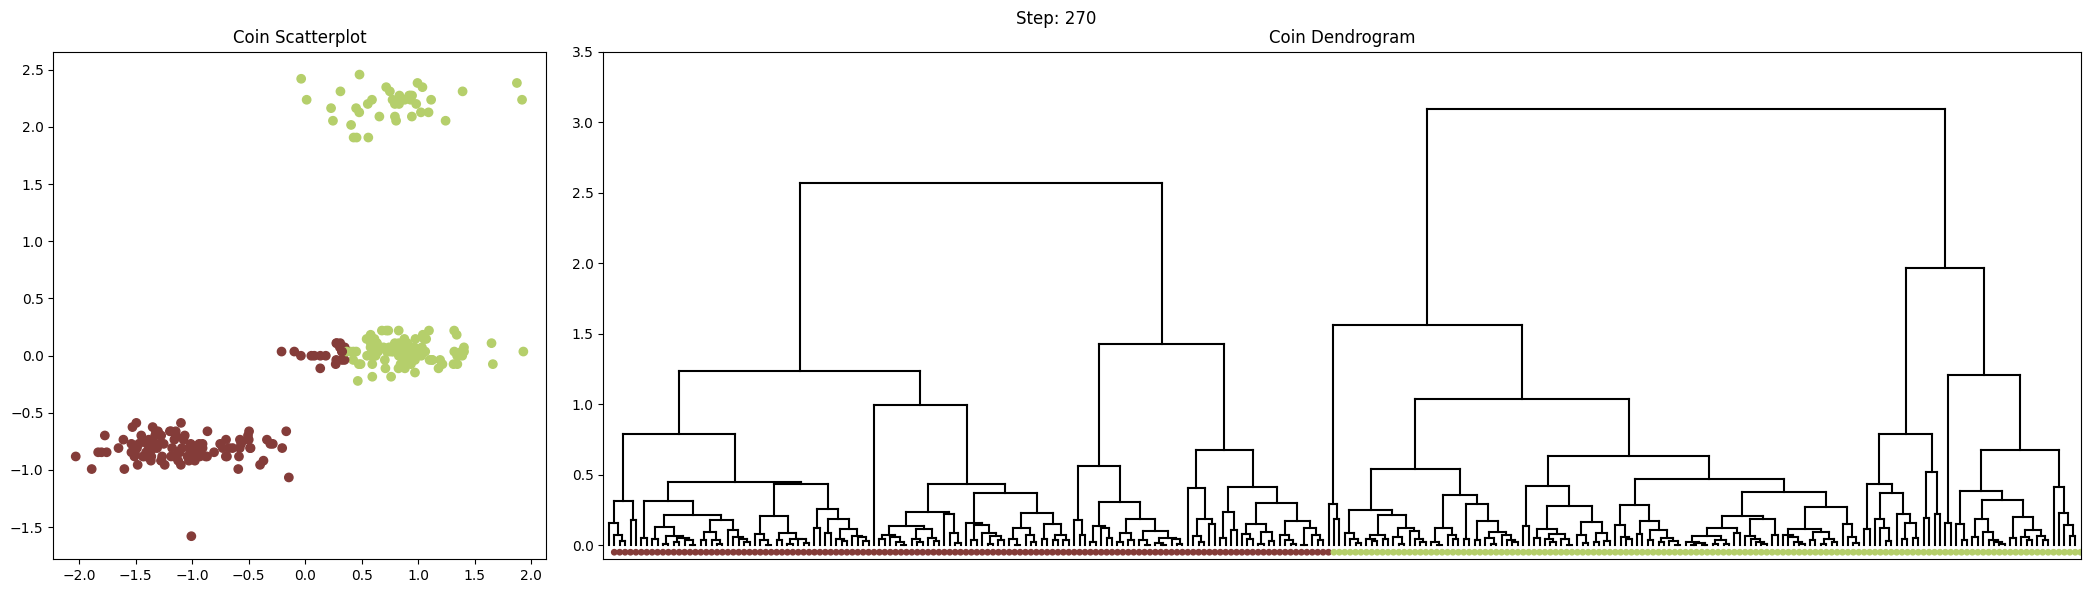

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage, dendrogram

# Load your data
coins = pd.read_csv("../../data/coins.csv")

# Standardize the data
def standard_units(my_data):
    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof=1)
    return (my_data - my_mean) / my_stddev

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

# Perform hierarchical clustering
Z = linkage(coins_su, method='complete')

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
cluster_heights = {i: 0 for i in range(len(coins_su))}
max_cluster_id = len(coins_su)

# Define a discrete colormap and generate a list of colors
n_clusters = len(coins_su)
cmap = plt.cm.tab20b(np.linspace(0, 1, n_clusters))
np.random.shuffle(cmap)

# Create a color mapping for each point
point_colors = {i: cmap[i] for i in range(n_clusters)}

# Set up the figure and axes
fig, (ax_scatter, ax_dendro) = plt.subplots(1, 2, width_ratios=[1, 3], figsize=(21, 6))
fig.suptitle('Step: 0',fontdict={'fontsize': 24})
fig.tight_layout()

# Initial scatter plot with all points colored according to the color mapping
scatter = ax_scatter.scatter(coins_su['diameter'], coins_su['weight'], 
                             c=[point_colors[i] for i in range(len(coins_su))])
ax_scatter.set_title("Coin Scatterplot")

# Prepare the dendrogram data but don't plot yet
dendro = dendrogram(Z, color_threshold=0, above_threshold_color='gray', no_labels=True, no_plot=True)
ax_dendro.scatter(np.arange(1,273)*10, np.zeros(len(point_colors))-0.05, s=15, c=[point_colors[i] for i in dendro['leaves']])
ax_dendro.set_xticks([])
ax_dendro.xaxis.set_tick_params(labelbottom=False)

point_to_leaf = pd.DataFrame({"points":np.arange(n_clusters),"leaves":dendro['leaves']})
leaf_to_point = point_to_leaf.sort_values("leaves")

cluster_xpos = {leaf: j * 10 + 5 for j, leaf in enumerate(dendro['leaves'])}

# Function to progressively draw the dendrogram
def draw_dendrogram(ax, dendro, num, colors):
    # Clear the previous dendrogram
    ax.clear()

    dendro_scatter = ax_dendro.scatter(np.arange(1,273)*10+5, np.zeros(len(colors))-0.05, s=15, c=[colors[i] for i in dendro['leaves']])

    # Set the title
    ax.set_title('Coin Dendrogram')

    # Draw each segment up to the current step
    for i in range(num + 1):
        c1, c2, dist, _ = Z[i]
        c1, c2 = int(c1), int(c2)

        # Determine the coordinates for cluster 1 and 2
        x1 = cluster_xpos[c1]
        x2 = cluster_xpos[c2]

        y1 = cluster_heights[c1]
        y2 = cluster_heights[c2]

        y = dist

        # Compute the x-position for the merged cluster
        x_new = (x1 + x2) / 2.0
        cluster_xpos[max_cluster_id + i] = x_new

        # Draw horizontal lines at the distance level
        ax.plot([x1, x2], [y, y], 'k-')
        # Draw vertical lines to the new merge point
        ax.plot([x1, x1], [y1, y], 'k-')
        ax.plot([x2, x2], [y2, y], 'k-')

    # Set labels and ticks
    ax.set_xticks([])
    ax.xaxis.set_tick_params(labelbottom=False)
            
    # Set the x and y limits based on the data
    ax.set_xlim(-5, 
                len(coins_su)*10+5)
    ax.set_ylim(-0.1, 3.5)

# Initialization function for FuncAnimation
def init():
    scatter.set_color([point_colors[i] for i in range(len(coins_su))])
    draw_dendrogram(ax_dendro, dendro, 0, [point_colors[i] for i in dendro['leaves']])
    return scatter,

# Function to update both plots
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, dist, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster
    clusters1[max_cluster_id + num] = new_cluster

    # Update cluster heights
    cluster_heights[max_cluster_id + num] = dist

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su), dtype=object)
    for cluster_id, points in clusters.items():
        for point in points:
            colors[point] = point_colors[points[0]]

    # Update scatter plot
    scatter.set_color(colors)
    fig.suptitle(f'Step: {num + 1}')

    # Draw the dendrogram up to the current step
    draw_dendrogram(ax_dendro, dendro, num, colors)

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z) - 1, init_func=init, repeat=False, blit=True)

# Save the animation
ani.save('agglomerative_clustering_with_dendrogram.mp4', writer='ffmpeg', fps=4)

# Show the plot
plt.show()
